# **Ames Housing Price Prediction**

This notebook demonstrates an end-to-end regression pipeline using the Ames Housing Dataset. It includes data cleaning, feature engineering, model training (Linear Regression, Ridge), and evaluation using R² and RMSE.

**Tools Used:** Python, Numpy, Pandas, Scikit-learn, Seaborn, Matplotlib  
**Techniques:** Data Imputation, Feature Transformation, Regularization, Cross-Validation


Dataset: [Ames Housing Dataset](https://www.kaggle.com/datasets/prevek18/ames-housing-dataset/data)


In [1]:
#imports 
import math
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from scipy.stats import skew



### **Dataset Loading & Initial Exploration**

In [2]:
df = pd.read_csv("./data/AmesHousing.csv")

df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
print(f"Dataset shape:{df.shape}")
print(f"Data info: {df.info()}")

Dataset shape:(2930, 82)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   ob

In [4]:
print(f"Data description: {df.describe()}")

Data description:             Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.245361  

### **Exploratory Data Analysis (EDA)**
**1.Missing values**

- Calculate missing values count per feature


In [5]:

missing_values = df.isnull().sum() #total missing values per feature/column 

missing_values = missing_values[missing_values>0].sort_values(ascending=False) #sort the missing values count descendingly 

print(f" Missing values per features:{missing_values}")

 Missing values per features:Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Yr Blt      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
BsmtFin SF 1         1
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Electrical           1
dtype: int64


### **Exploratory Data Analysis (EDA)**
**1.Missing values**

- Calculate missing values count per feature
- Visulaize missing values


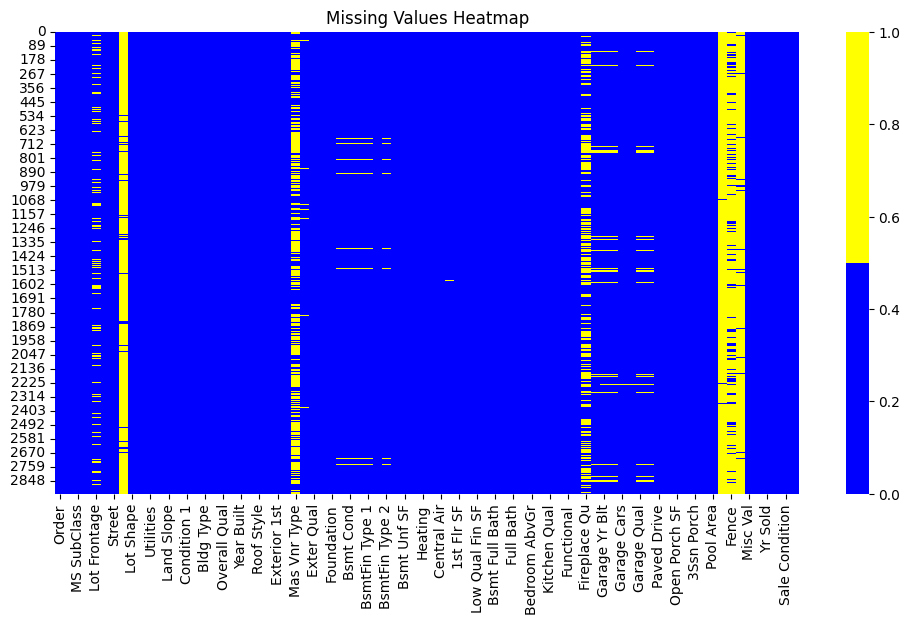

In [6]:
plt.figure(figsize=(12,6))

sns.heatmap(df.isnull(),cbar=True,cmap=['blue','yellow'] )

plt.title('Missing Values Heatmap')

plt.show()

### **Exploratory Data Analysis (EDA)**
**1.Missing values**

- Calculate missing values count per feature
- Visulaize missing values


**2.Distribution of target variable: SalePrice**



Skewness:1.7435000757376466
Kurtosis:5.118899951130896


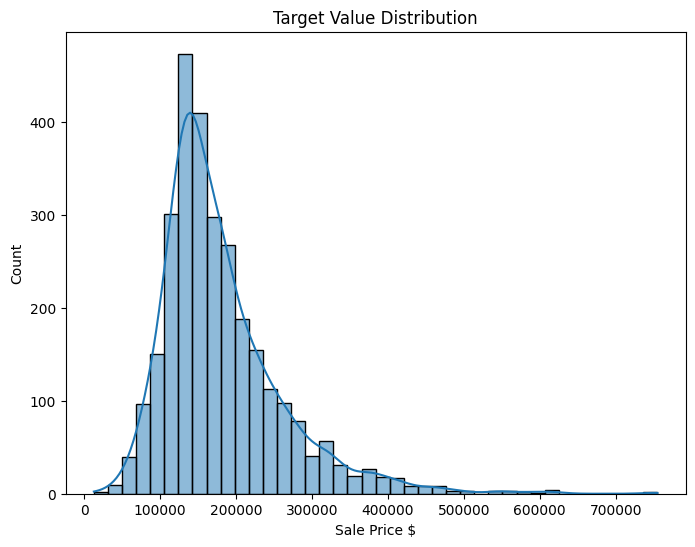

In [7]:
plt.figure(figsize=(8,6))

sns.histplot(df["SalePrice"],kde=True,bins=40)

plt.title("Target Value Distribution")
plt.xlabel("Sale Price $")
plt.ylabel("Count")

print(f"Skewness:{df['SalePrice'].skew()}")
print(f"Kurtosis:{df['SalePrice'].kurt()}")

### **Exploratory Data Analysis (EDA)**
**1.Missing values**

- Calculate missing values count per feature
- Visulaize missing values


**2.Distribution of target variable: SalePrice**

**3.Correlation matrix of target value with all features**



Top 10 correlated features with the target value are:
SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Name: SalePrice, dtype: float64


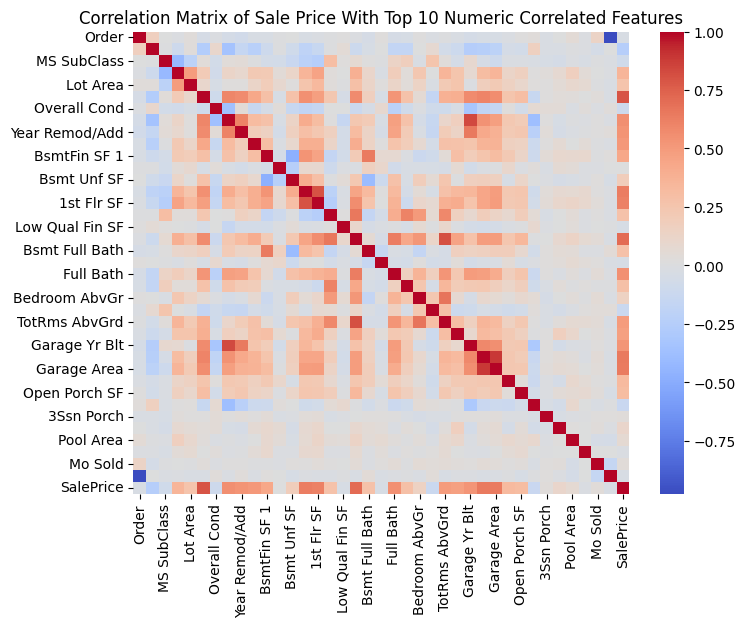

In [8]:
corr_matrix=df.corr(numeric_only=True) #calculate the correlation matrix of all features and target value 

top_corr = corr_matrix['SalePrice'].sort_values(ascending=False).head(10) #extract the highest 10 correlated features

print("Top 10 correlated features with the target value are:")
print(top_corr)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Matrix of Sale Price With Top 10 Numeric Correlated Features")
plt.show()

<Axes: >

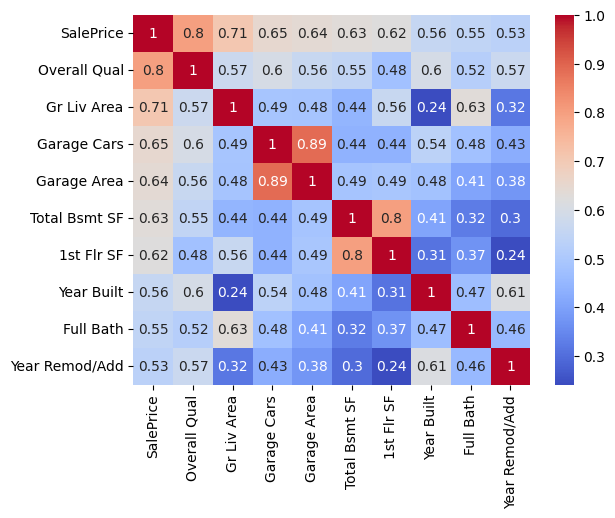

In [9]:
#Correlation matrix with top 9 features only
corr = df.corr(numeric_only=True)
top_corr = corr["SalePrice"].sort_values(ascending=False).head(10)
sns.heatmap(df[top_corr.index].corr(), cmap='coolwarm',annot=True)

### **Exploratory Data Analysis (EDA)**
**1.Missing values**

- Calculate missing values count per feature
- Visulaize missing values


**2.Distribution of target variable: SalePrice**

**3.Correlation matrix of target value with all features**

**4."Categorical" vs "Numerical" features count**

In [10]:
cat_features=df.select_dtypes(include=['object']).columns
num_features = df.select_dtypes(exclude=['object']).columns

print(f"Number of categorical features:{len(cat_features)}")
print(f"Number of numerical features:{len(num_features)}")

print("Categorical Features:")
print(cat_features.to_list())

print("Numerical Features")
print(num_features.to_list())

Number of categorical features:43
Number of numerical features:39
Categorical Features:
['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']
Numerical Features
['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full

### **Data Cleaning & Preprocessing**

**1.Handle Missing Values**
- Drop features with more than 30% missing values

In [11]:
#Calculate missing ratio in each column 
missing_ratio = df.isnull().sum()/len(df)

#Drop any feature with more than 30% missing values
drop_cols = missing_ratio[missing_ratio>0.3].index

print(f"Drooped Features:{drop_cols}")
df.drop(columns=drop_cols,inplace=True)

Drooped Features:Index(['Alley', 'Mas Vnr Type', 'Fireplace Qu', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')


In [12]:
print(df.shape)

(2930, 76)


### **Data Cleaning & Preprocessing**

**1.Handle Missing Values**
- Drop features with more than 30% missing values
- Fill missing values for features with missing values less than 30% with median in case of numerical and mode in case of categorical featrures

In [13]:
#Numerical Features 
num_features=df.select_dtypes(exclude=['object']).columns

for feature in num_features:
    df[feature] = df[feature].fillna(df[feature].median())

In [14]:
#Categorical Features 
cat_features = df.select_dtypes(include=['object']).columns

for feature in cat_features:
    df[feature] = df[feature].fillna(df[feature].mode()[0])

### **Feature Engineering**

**1.Encode categorical variables using one-hot encoding**

In [15]:
df_encoded = pd.get_dummies(df,drop_first=True)

#Recalculate numerical columns since original numeric cols are changed(add to it encodded categorical ones)
num_features_encoded = df_encoded.select_dtypes(include=[np.number]).columns.drop('SalePrice')


### **Feature Engineering**

**1.Encode categorical variables using one-hot encoding**

**2.Transform skewed numerical features using log transform**

In [16]:
#Calculate skew value for each feature
skewness = df_encoded[num_features_encoded].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

#Extract features with high skew value (>0.75)
skew_features = skewness[skewness>0.75].index

#Transform skewed features logarithmiclly 
for feature in skew_features:
    df_encoded[feature]=np.log1p(df_encoded[feature]) #use np.log1p to handle log(0) undefinetion

### **Data Split**

In [17]:
X = df_encoded.drop('SalePrice', axis=1) #Feature array
y=df_encoded['SalePrice']                #Traget value array 

#Train/Test split
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### **Feature Scalling for faster gradient descent convergance**

In [18]:
scaler = StandardScaler()                       #instentate from StandardScaler class
X_train_scaled = scaler.fit_transform(X_train)  #data mean and std are calculated from training data
X_test_scaled = scaler.transform(X_test)        #to avoid data leakage

In [19]:
print(f"Final training set shape: {X_train_scaled.shape}")
print(f"Final test set shape: {X_test_scaled.shape}")

Final training set shape: (2344, 244)
Final test set shape: (586, 244)


### **Model Training With Linear Regression**

1. Cost Function in Linear Regression 


        Mean Squared Error (MSE) Formula:
$$
J(w,b) = \frac{1}{2m} \sum_{i=0}^{m-1} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right)^2  + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \
$$

Where:
- $J(w,b)$ is the cost function
- $w$, $b$ are the model parameters (weight and bias)
- $m$ is the number of training examples
- $f_{w,b}(x^{(i)}) = w \cdot x^{(i)} + b$ is the linear regression prediction
-  $y^{(i)}$ is the true target value for the $i^{th}$ training example
-  $\lambda$ is the regularization parameter that keeps weights small as possible to avoid overfitting
- $n$ is the number of features


2. Calculate Gradient for Linear Regression 

$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j \       ,j:0..n\\     




\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \ 
\end{align*}$$


Where:
* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target


3. Batch Gradient Descent

$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

### **Linear Regression Model Train**

In [24]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("📈 Linear Regression Results:")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²: {r2_lr:.4f}")

📈 Linear Regression Results:
RMSE: 29624.19
R²: 0.8905


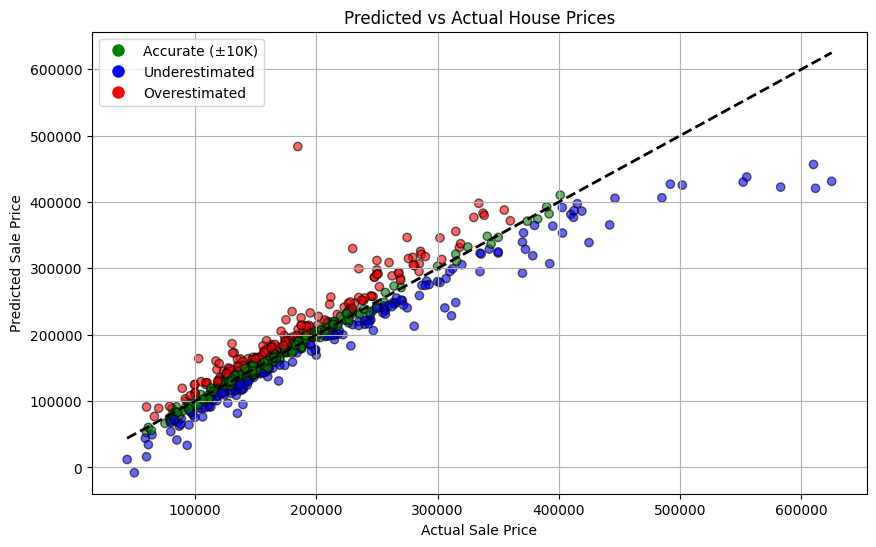

In [25]:
# Calculate residuals (error)
residuals = y_pred_lr - y_test

# Define colors:
# - Green: close prediction (within ±$10K)
# - Blue: underestimated
# - Red: overestimated
colors = np.where(np.abs(residuals) < 10000, 'green',
          np.where(residuals < 0, 'blue', 'red'))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, c=colors, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 45-degree line

plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Predicted vs Actual House Prices")
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Accurate (±10K)', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Underestimated', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Overestimated', markerfacecolor='red', markersize=10)
])
plt.grid(True)
plt.show()

### **Ridge Regression Model Training**

- Use the Grid search to optimize the **alpha** hyperparameter


In [26]:
# Log-transform target to reduce skew
y_train_log = np.log1p(y_train)

ridge_params = {'alpha': [0.01, 0.1, 1, 10, 50, 100]}
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_root_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train_log)


#Predict using trained model
y_pred_log = ridge_grid.predict(X_test_scaled)

#Invert the log transform 
y_pred = np.expm1(y_pred_log)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred))
r2_ridge = r2_score(y_test, y_pred)


print("Ridge Regression Results:")
print(f"Best alpha: {ridge_grid.best_params_['alpha']}")
print(f"Test RMSE: {rmse_ridge:.2f}")
print(f"Test R²: {r2_ridge}")


Ridge Regression Results:
Best alpha: 100
Test RMSE: 27675.16
Test R²: 0.9044702076506005


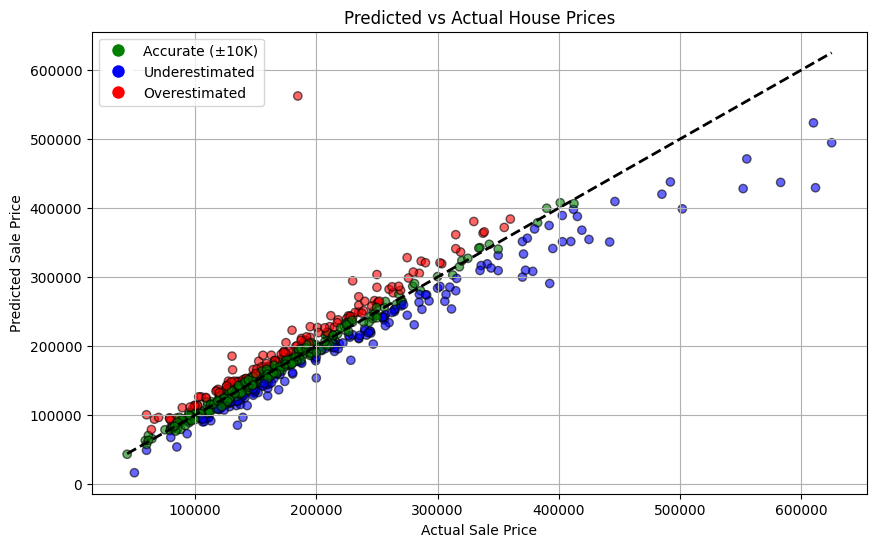

In [27]:
# Calculate residuals (error)
residuals = y_pred - y_test

# Define colors:
# - Green: close prediction (within ±$10K)
# - Blue: underestimated
# - Red: overestimated
colors = np.where(np.abs(residuals) < 10000, 'green',
          np.where(residuals < 0, 'blue', 'red'))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c=colors, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 45-degree line

plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Predicted vs Actual House Prices")
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Accurate (±10K)', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Underestimated', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Overestimated', markerfacecolor='red', markersize=10)
])
plt.grid(True)
plt.show()

| Model             | R² Score | RMSE     |
| ----------------- | -------- | ------   |
| Linear Regression | 0.89     | 29624.19 |
| Ridge Regression  | 0.90     | 27675.16 |
